In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Read and preprocess the data
data = pd.read_csv("/content/weather.csv")
data.dropna(inplace=True)  # Drop rows with missing values
X = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le
print(data)


            Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
5939  2009-01-01         Cobar     17.9     35.2       0.0         12.0   
5940  2009-01-02         Cobar     18.4     28.9       0.0         14.8   
5942  2009-01-04         Cobar     19.4     37.6       0.0         10.8   
5943  2009-01-05         Cobar     21.9     38.4       0.0         11.4   
5944  2009-01-06         Cobar     24.2     41.0       0.0         11.2   
...          ...           ...      ...      ...       ...          ...   
9994  2012-01-04  CoffsHarbour     19.6     28.6       0.0          7.4   
9995  2012-01-05  CoffsHarbour     21.3     26.5       0.6          7.6   
9996  2012-01-06  CoffsHarbour     18.4     27.6       0.0          5.0   
9997  2012-01-07  CoffsHarbour     18.3     26.1       0.0          7.6   
9998  2012-01-08  CoffsHarbour     21.4     29.2       0.0          5.8   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
5939      12.3         SSW

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

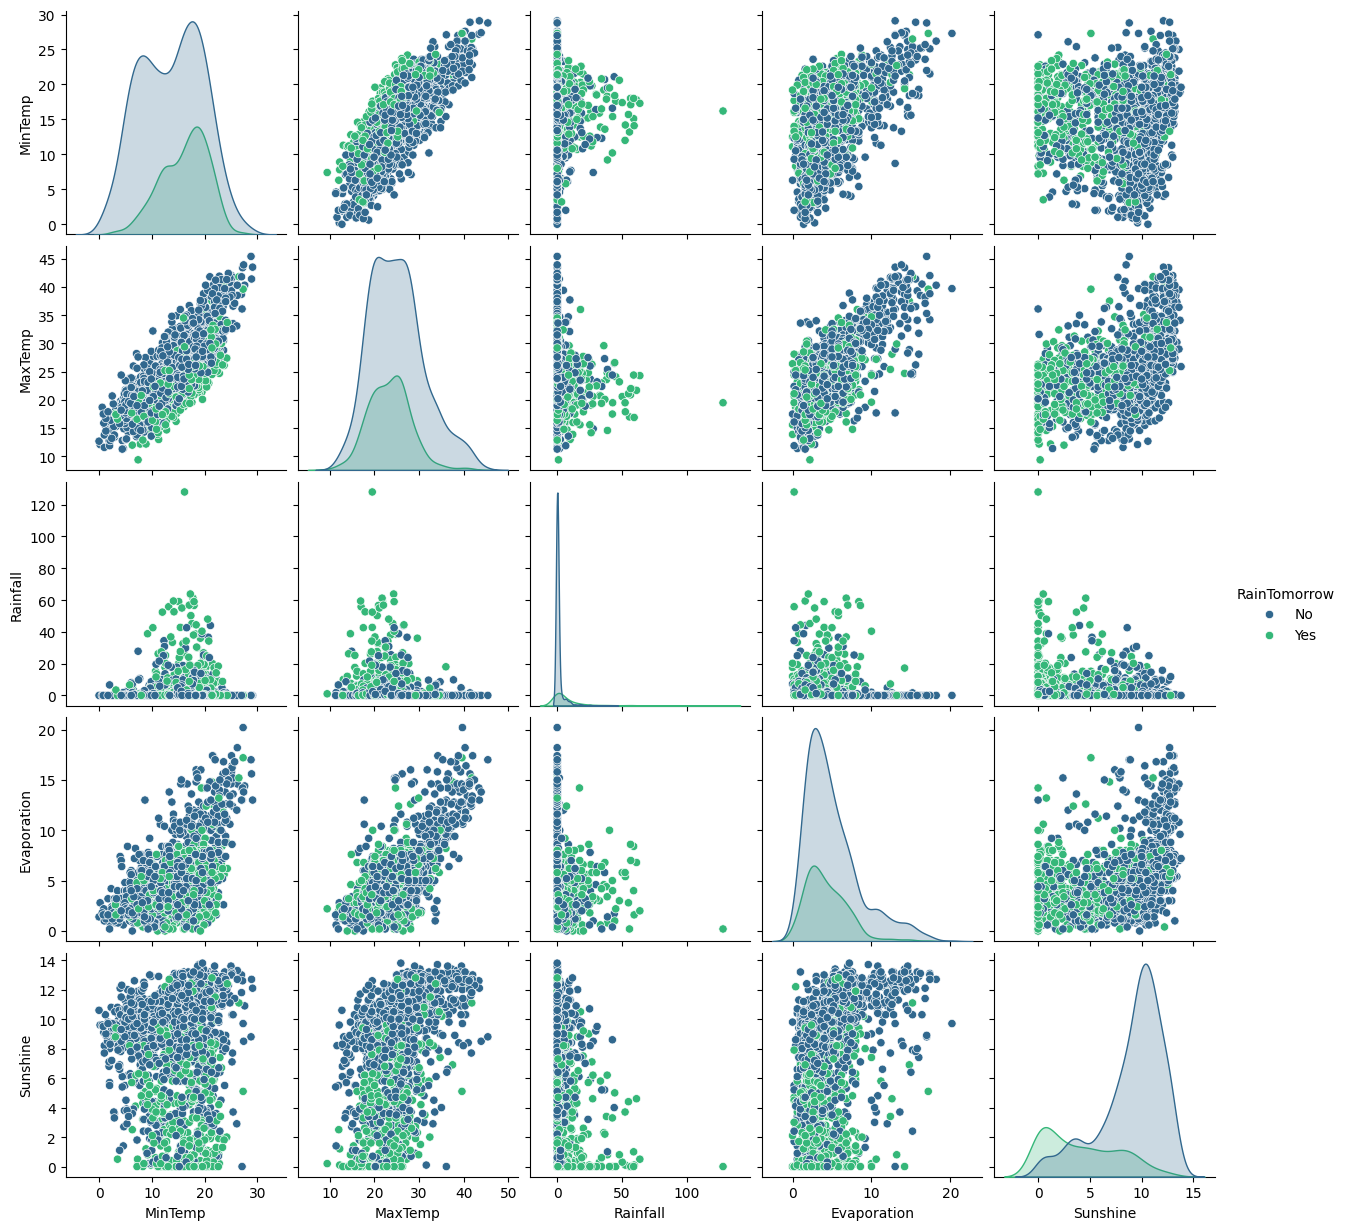

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/content/weather.csv")
data.dropna(inplace=True)
data['RainTomorrow'] = data['RainTomorrow'].astype('category')
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'RainTomorrow']

sns.pairplot(data[features], hue='RainTomorrow', palette='viridis')
plt.show()

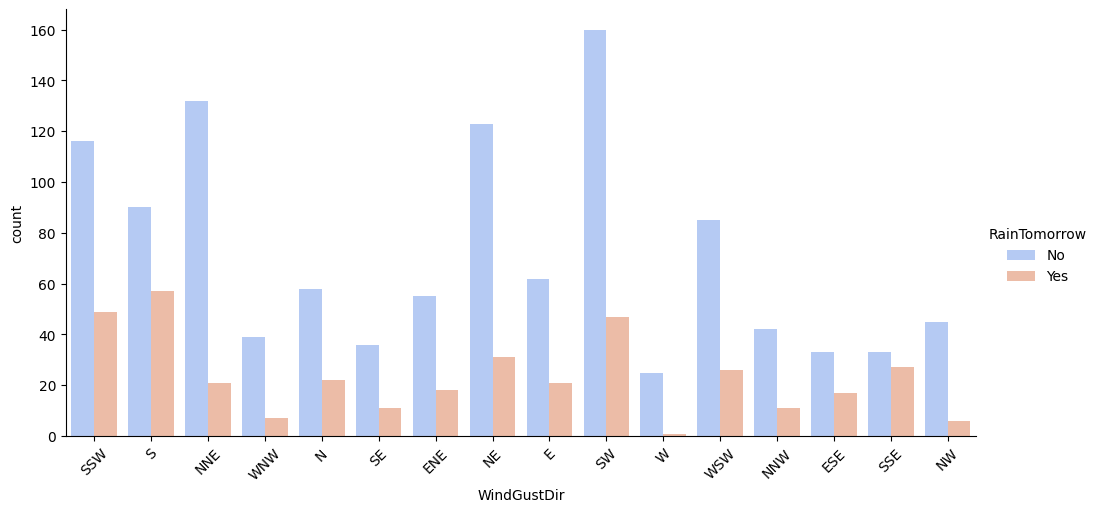

In [15]:
sns.catplot(x='WindGustDir', kind='count', hue='RainTomorrow', data=data, palette='coolwarm', height=5, aspect=2)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression confusion matrix heatmap


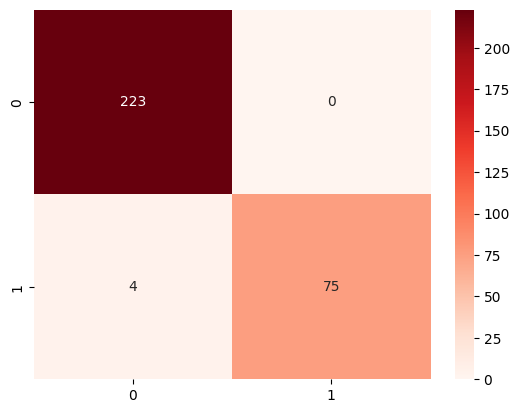

Logistic Regression Accuracy: 0.9867549668874173
Logistic Regression precision: 1.0
Logistic Regression recall: 0.9493670886075949
Logistic Regression f1-score: 0.974025974025974


In [5]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_confusion_matrix = confusion_matrix(y_test, lr_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, pos_label='Yes')
lr_recall = recall_score(y_test, lr_pred, pos_label='Yes')
lr_f1_score = f1_score(y_test, lr_pred, pos_label='Yes')

# Print Logistic Regression results
print("Logistic Regression confusion matrix heatmap")
sns.heatmap(lr_confusion_matrix, annot=True, fmt='d', cmap='Reds')
plt.show()
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression precision:", lr_precision)
print("Logistic Regression recall:", lr_recall)
print("Logistic Regression f1-score:", lr_f1_score)

K Nearest Neighbors confusion matrix heatmap


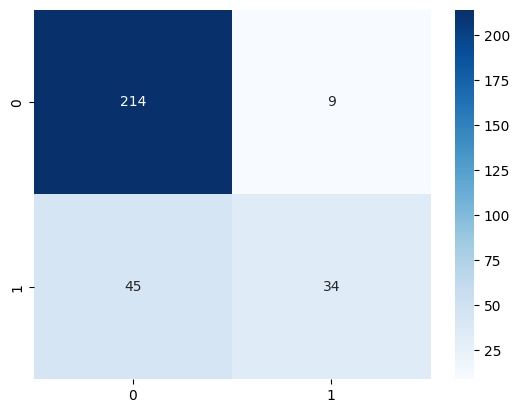

K Nearest Neighbors Accuracy: 0.8211920529801324
K Nearest Neighbors precision: 0.7906976744186046
K Nearest Neighbors recall: 0.43037974683544306
K Nearest Neighbors f1-score: 0.5573770491803279


In [6]:
# K Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, pos_label='Yes')
knn_recall = recall_score(y_test, knn_pred, pos_label='Yes')
knn_f1_score = f1_score(y_test, knn_pred, pos_label='Yes')


# Print K Nearest Neighbors results
print("K Nearest Neighbors confusion matrix heatmap")
sns.heatmap(knn_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()
print("K Nearest Neighbors Accuracy:", knn_accuracy)
print("K Nearest Neighbors precision:", knn_precision)
print("K Nearest Neighbors recall:", knn_recall)
print("K Nearest Neighbors f1-score:", knn_f1_score)

Decision Tree confusion matrix heatmap


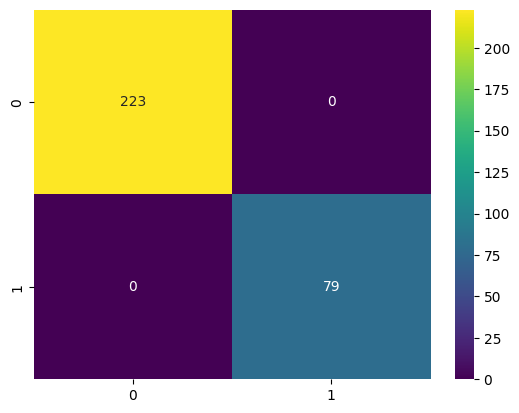

Decision Tree Accuracy: 1.0
Decision Tree precision: 1.0
Decision Tree recall: 1.0
Decision Tree f1-score: 1.0


In [7]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_confusion_matrix = confusion_matrix(y_test, dt_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, pos_label='Yes')
dt_recall = recall_score(y_test, dt_pred, pos_label='Yes')
dt_f1_score = f1_score(y_test, dt_pred, pos_label='Yes')

# Print Decision Tree results
print("Decision Tree confusion matrix heatmap")
sns.heatmap(dt_confusion_matrix, annot=True, fmt='d', cmap='viridis')
plt.show()
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree precision:", dt_precision)
print("Decision Tree recall:", dt_recall)
print("Decision Tree f1-score:", dt_f1_score)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machine confusion matrix heatmap


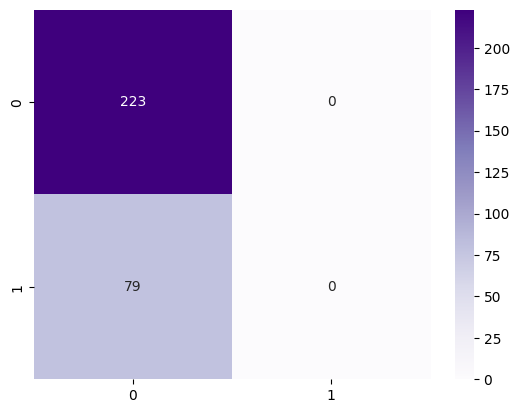

Support Vector Machine Accuracy: 0.7384105960264901
Support Vector Machine precision: 0.0
Support Vector Machine recall: 0.0
Support Vector Machine f1-score: 0.0


In [8]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_confusion_matrix = confusion_matrix(y_test, svm_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, pos_label='Yes')
svm_recall = recall_score(y_test, svm_pred, pos_label='Yes')
svm_f1_score = f1_score(y_test, svm_pred, pos_label='Yes')

# Print Support Vector Machine results
print("Support Vector Machine confusion matrix heatmap")
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Purples')
plt.show()
print("Support Vector Machine Accuracy:", svm_accuracy)
print("Support Vector Machine precision:", svm_precision)
print("Support Vector Machine recall:", svm_recall)
print("Support Vector Machine f1-score:", svm_f1_score)

Train Random Forest confusion matrix heatmap


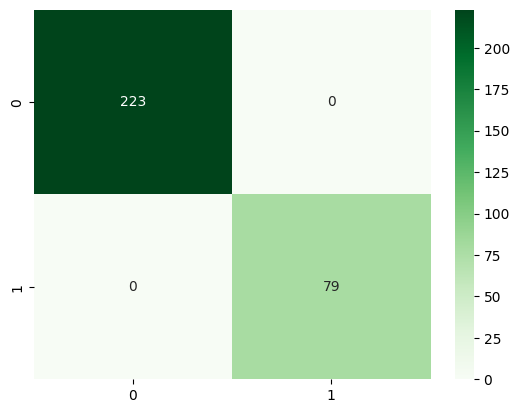

Train Random Forest Accuracy: 1.0
Train Random Forest precision: 1.0
Train Random Forest recall: 1.0
Train Random Forest f1-score: 1.0


In [9]:
# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, pos_label='Yes')
rf_recall = recall_score(y_test, rf_pred, pos_label='Yes')
rf_f1_score = f1_score(y_test, rf_pred, pos_label='Yes')

# Print Random Forest results
print("Train Random Forest confusion matrix heatmap")
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Greens')
plt.show()
print("Train Random Forest Accuracy:", rf_accuracy)
print("Train Random Forest precision:", rf_precision)
print("Train Random Forest recall:", rf_recall)
print("Train Random Forest f1-score:", rf_f1_score)

Adaboost confusion matrix heatmap


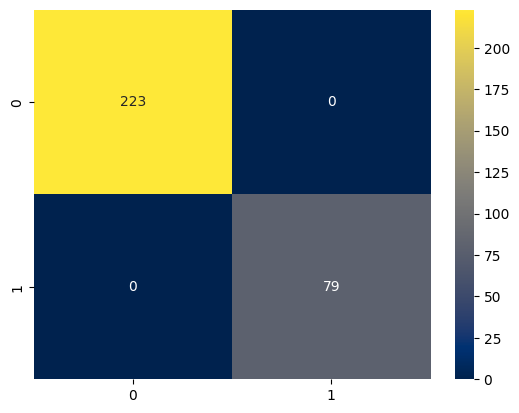

Adaboost Accuracy: 1.0
Adaboost precision: 1.0
Adaboost recall: 1.0
Adaboost f1-score: 1.0


In [10]:
# Adaboost
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_pred)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_precision = precision_score(y_test, adaboost_pred, pos_label='Yes')
adaboost_recall = recall_score(y_test, adaboost_pred, pos_label='Yes')
adaboost_f1_score = f1_score(y_test, adaboost_pred, pos_label='Yes')

# Print Adaboost results
print("Adaboost confusion matrix heatmap")
sns.heatmap(adaboost_confusion_matrix, annot=True, fmt='d', cmap='cividis')
plt.show()
print("Adaboost Accuracy:", adaboost_accuracy)
print("Adaboost precision:", adaboost_precision)
print("Adaboost recall:", adaboost_recall)
print("Adaboost f1-score:", adaboost_f1_score)